<a href="https://colab.research.google.com/github/dhender77/Coursework/blob/main/Notebook3_Henderson.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Notebook #3: Cross Validation with kNN and Wine Ratings
**Name: your name here**


Prepare the data

In [ ]:
import pandas
import numpy
from google.colab import drive 
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# change the path so to access the data on your drive 
wine_data = pandas.read_csv('/content/drive/MyDrive/CS 167/winequality-white.csv')

# Exercise #1. 
Implement mean squared error (mse) algorithm

In [ ]:
def mse(actual,predicted):
    # INPUT: 
    #   actual: a list of values
    #   predicted: a list of value
    #   (we assume that number of elements in actual and predicted match)
    mse = ((actual - predicted)**2).mean()
    return mse
    # OUTPUT: 
    #   the mean squared error between the actual and predicted values

In [ ]:
import pandas as pd
actual_vals = pd.Series([7,8,3,5,10])
predicted_vals = pd.Series([5,2,8,7,14])
mse(actual_vals,predicted_vals)

17.0

# Exercise #2
Implement the testing and training data. Use the approximately the first 320 rows in the shuffled set as testing data. 

In [ ]:
# change the path so to access the data on your drive 
wine_data = pandas.read_csv('/content/drive/MyDrive/CS 167/winequality-white.csv')
shuffled_data = wine_data.sample(frac=1, random_state=41)

#use the first 20 rows in the shuffled set as testing data 
#train with the rest.
test_data = shuffled_data.iloc[0:200]
train_data = shuffled_data.iloc[200:]
train_data.shape
# establish test_data and train_data here

(1399, 12)

# Exercise #3
Use the kNN implementation and the other code provided below to normalize your data. Test your model using several different values of k and **graphically show** the results using your implementation of **mse**.

In [ ]:
import numpy

def regression_kNN(specimen, data, k):
  data_copy = data.copy()
  data_copy['distance_to_new'] = numpy.sqrt(
    (specimen['fixed acidity']-data['fixed acidity'])**2
    +(specimen['volatile acidity']-data['volatile acidity'])**2
    +(specimen['citric acid']-data['citric acid'])**2
    +(specimen['residual sugar']-data['residual sugar'])**2
    +(specimen['chlorides']-data['chlorides'])**2
    +(specimen['free sulfur dioxide']-data['free sulfur dioxide'])**2
    +(specimen['total sulfur dioxide']-data['total sulfur dioxide'])**2
    +(specimen['density']-data['density'])**2
    +(specimen['pH']-data['pH'])**2
    +(specimen['sulphates']-data['sulphates'])**2
    +(specimen['alcohol']-data['alcohol'])**2
    )
  sorted_data = data_copy.sort_values(['distance_to_new']) 
  return sorted_data.iloc[0:k]['quality'].mean()

In [ ]:
def regressions_all_kNN(test_data,train_data,k):
    #apply the regression_kNN function to each item in the test data with the train
    #data and k passed as the other two arguments. The result will be a series of 
    #the individual results.
    results = []
    for i in range(len(test_data)):
      prediction = regression_kNN(test_data.iloc[i], train_data,k)
      results.append(prediction)
    return pandas.Series(results)

In [ ]:
# normalize the data (part 1) -- calculate the mean and standard deviation values for the predictor columns
fixed_acidity_mean = train_data['fixed acidity'].mean()
fixed_acidity_std = train_data['fixed acidity'].std()
volatile_acidity_mean = train_data['volatile acidity'].mean()
volatile_acidity_std = train_data['volatile acidity'].std()
citric_acid_mean = train_data['citric acid'].mean()
citric_acid_std = train_data['citric acid'].std()
residual_sugar_mean = train_data['residual sugar'].mean()
residual_sugar_std = train_data['residual sugar'].std()
chlorides_mean = train_data['chlorides'].mean()
chlorides_std = train_data['chlorides'].std()
free_sulfur_dioxide_mean = train_data['free sulfur dioxide'].mean()
free_sulfur_dioxide_std = train_data['free sulfur dioxide'].std()
total_sulfur_dioxide_mean = train_data['total sulfur dioxide'].mean()
total_sulfur_dioxide_std = train_data['total sulfur dioxide'].std()
density_mean = train_data['density'].mean()
density_std = train_data['density'].std()
pH_mean = train_data['pH'].mean()
pH_std = train_data['pH'].std()
sulphates_mean = train_data['sulphates'].mean()
sulphates_std = train_data['sulphates'].std()
alcohol_mean = train_data['alcohol'].mean()
alcohol_std = train_data['alcohol'].std()


In [ ]:
 # normalize the data (part 1) -- normalize both the training and testing data frames
train_norm_data = train_data.copy()
test_norm_data = test_data.copy()

# update the columns in train_norm_data 
train_norm_data['fixed acidity'] = (train_data['fixed acidity'] - fixed_acidity_mean)/fixed_acidity_std
train_norm_data['volatile acidity'] = (train_data['volatile acidity'] - volatile_acidity_mean)/volatile_acidity_std
train_norm_data['citric acid'] = (train_data['citric acid'] - citric_acid_mean)/citric_acid_std
train_norm_data['residual sugar'] = (train_data['residual sugar'] - residual_sugar_mean)/residual_sugar_std
train_norm_data['chlorides'] = (train_data['chlorides'] - chlorides_mean)/chlorides_std
train_norm_data['free sulfur dioxide'] = (train_data['free sulfur dioxide'] - free_sulfur_dioxide_mean)/free_sulfur_dioxide_std
train_norm_data['total sulfur dioxide'] = (train_data['total sulfur dioxide'] - total_sulfur_dioxide_mean)/total_sulfur_dioxide_std
train_norm_data['density'] = (train_data['density'] - density_mean)/density_std
train_norm_data['pH'] = (train_data['pH'] - pH_mean)/pH_std
train_norm_data['sulphates'] = (train_data['sulphates'] - sulphates_mean)/sulphates_std
train_norm_data['alcohol'] = (train_data['alcohol'] - alcohol_mean)/alcohol_std

# update the columns in test_norm_data 
test_norm_data['fixed acidity'] = (test_data['fixed acidity'] - fixed_acidity_mean)/fixed_acidity_std
test_norm_data['volatile acidity'] = (test_data['volatile acidity'] - volatile_acidity_mean)/volatile_acidity_std
test_norm_data['citric acid'] = (test_data['citric acid'] - citric_acid_mean)/citric_acid_std
test_norm_data['residual sugar'] = (test_data['residual sugar'] - residual_sugar_mean)/residual_sugar_std
test_norm_data['chlorides'] = (test_data['chlorides'] - chlorides_mean)/chlorides_std
test_norm_data['free sulfur dioxide'] = (test_data['free sulfur dioxide'] - free_sulfur_dioxide_mean)/free_sulfur_dioxide_std
test_norm_data['total sulfur dioxide'] = (test_data['total sulfur dioxide'] - total_sulfur_dioxide_mean)/total_sulfur_dioxide_std
test_norm_data['density'] = (test_data['density'] - density_mean)/density_std
test_norm_data['pH'] = (test_data['pH'] - pH_mean)/pH_std
test_norm_data['sulphates'] = (test_data['sulphates'] - sulphates_mean)/sulphates_std
test_norm_data['alcohol'] = (test_data['alcohol'] - alcohol_mean)/alcohol_std

In [ ]:
predict = regressions_all_kNN(test_data,train_data,7)

In [ ]:
test = test_data['quality']
mse(test, predict)

0.7691326530612246

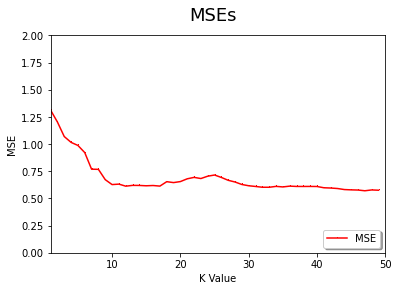

In [ ]:
series = []
for i in range(1,50):
  val = mse(test, regressions_all_kNN(test_data,train_data,i))
  series.append(val)


import matplotlib.pyplot as plt
%matplotlib inline
xvals = range(1, 50)
plt.suptitle('MSEs', fontsize=18)
plt.xlabel('K Value')
plt.ylabel('MSE')
plt.plot(xvals, series, 'r,-', label='MSE')
plt.legend(loc='lower right', shadow=True)
plt.axis([1, 50, 0, 2])
plt.show()


# Exercise #4
Repeat the experiment and **graphically show the results** using r^2.

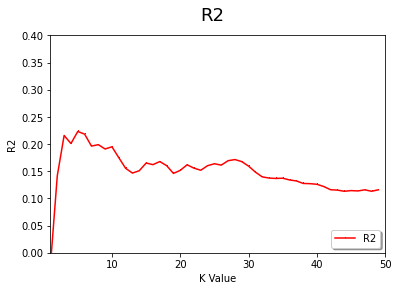

In [ ]:
import sklearn.metrics #we'll talk more about sklearn tomorrow

r_series = []
for i in range(1,50):
  val = sklearn.metrics.r2_score(test, regressions_all_kNN(test_data,train_data,i) )
  r_series.append(val)


import matplotlib.pyplot as plt
%matplotlib inline
xvals = range(1, 50)
plt.suptitle('R2', fontsize=18)
plt.xlabel('K Value')
plt.ylabel('R2')
plt.plot(xvals, r_series, 'r,-', label='R2')
plt.legend(loc='lower right', shadow=True)
plt.axis([1, 50, 0, .4])
plt.show()


# Exercise #5. 
Describe your findings. What conclusions can you draw about the best number for k for the k-NN algorithm for this data set? **Explain why.** Use a markdown cell to explain your conclusions.

#The MSE goes down from k = 1 to k = 10 and then plateaus quite a bit
#R2 is highest around 8 and then goes down quite a bit after that. 
#K = 10 seems to be the sweet spot where you get the most out of maximizing R2 and minimizing MSE.
#So I'd choose a k value of 10, which would give an MSE of about .65 and an R2 of about .20